### MACD
- MACD is a lagging indicator when trading on the crossovers
- https://www.investopedia.com/terms/m/macd.asp

**Calculation** (12-26-9 MACD (default), 8-17-9 MACD (more responsive))
- MACD=12-Period EMA − 26-Period EMA
- Singal line 9-Perioed EMA of MACD

**Signal**
- MACD > Signal line

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [12]:
ticker = pd.read_csv("ticker-fb.csv", index_col=0, parse_dates=True)

In [13]:
exp1 = ticker['Close'].ewm(span=8, adjust=False).mean()
exp2 = ticker['Close'].ewm(span=17, adjust=False).mean()
ticker['MACD'] = exp1 - exp2
ticker['Signal line'] = ticker['MACD'].ewm(span=9, adjust=False).mean()

In [14]:
ticker.tail()

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal line
Date,,,,,,,,
2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994,-2.607431,-1.271368
2020-12-28,277.299988,265.660004,268.739990,277.000000,23299700,277.000000,-1.686554,-1.354405
2020-12-29,280.510010,276.279999,276.950012,276.779999,16383000,276.779999,-1.032699,-1.290064
2020-12-30,278.079987,271.709991,277.950012,271.869995,11803800,271.869995,-1.100708,-1.252193
2020-12-31,277.089996,269.809998,272.000000,273.160004,12892900,273.160004,-0.977215,-1.197197


<IPython.core.display.Javascript object>


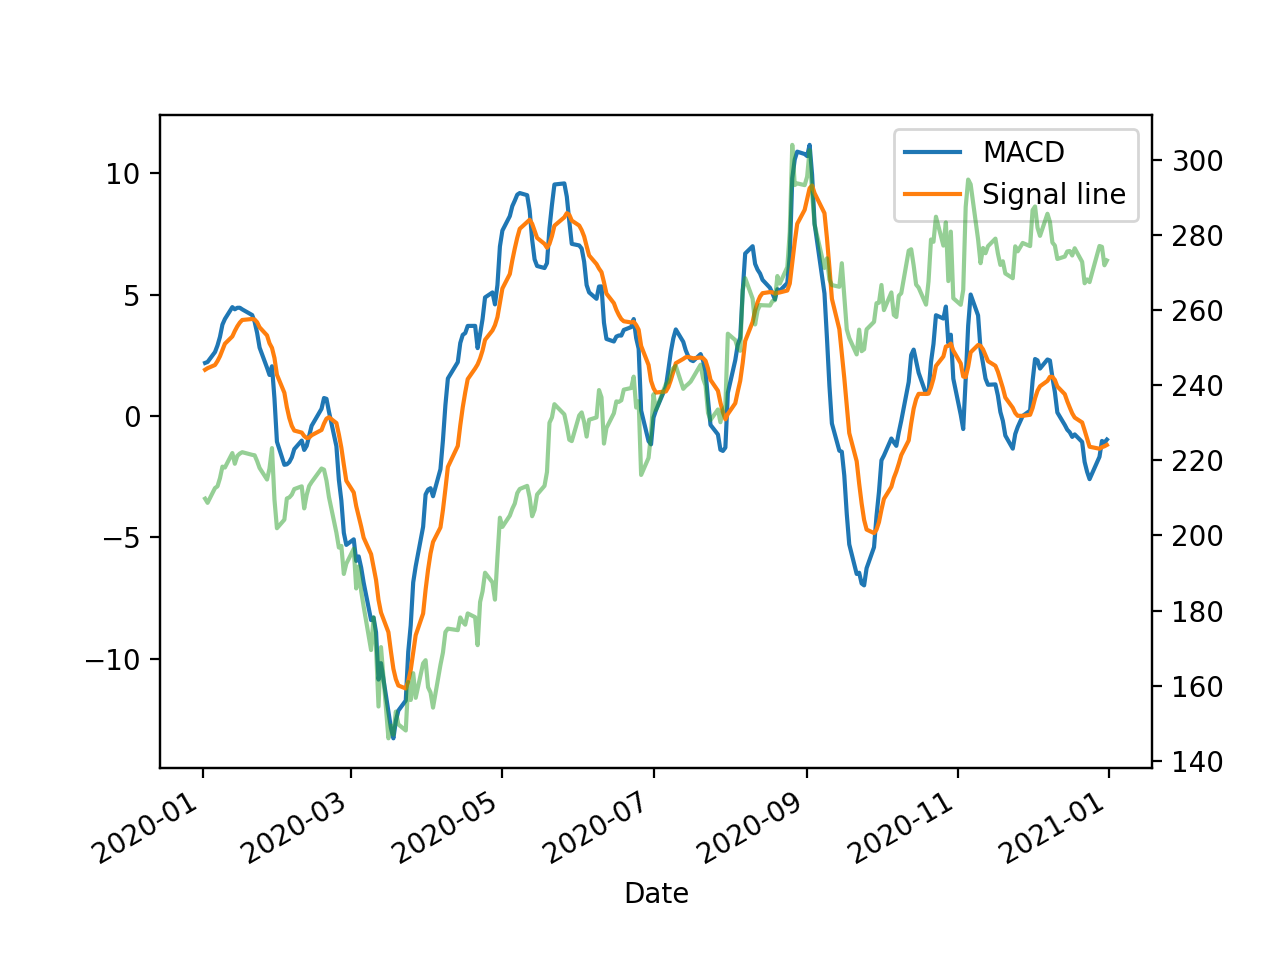

<AxesSubplot:label='383a565e-0e17-4d36-a5ea-fe6c708ea85b'>

In [15]:
fig, ax = plt.subplots()
ticker[['MACD', 'Signal line']].loc['2020-01-01':].plot(ax=ax)
ticker['Close'].loc['2020-01-01':].plot(ax=ax, secondary_y=True, alpha=0.5)

In [16]:
ticker['MACD'] > ticker['Signal line']

Date
2018-01-02    False
2018-01-03     True
2018-01-04     True
2018-01-05     True
2018-01-08     True
              ...  
2020-12-24    False
2020-12-28    False
2020-12-29     True
2020-12-30     True
2020-12-31     True
Length: 756, dtype: bool